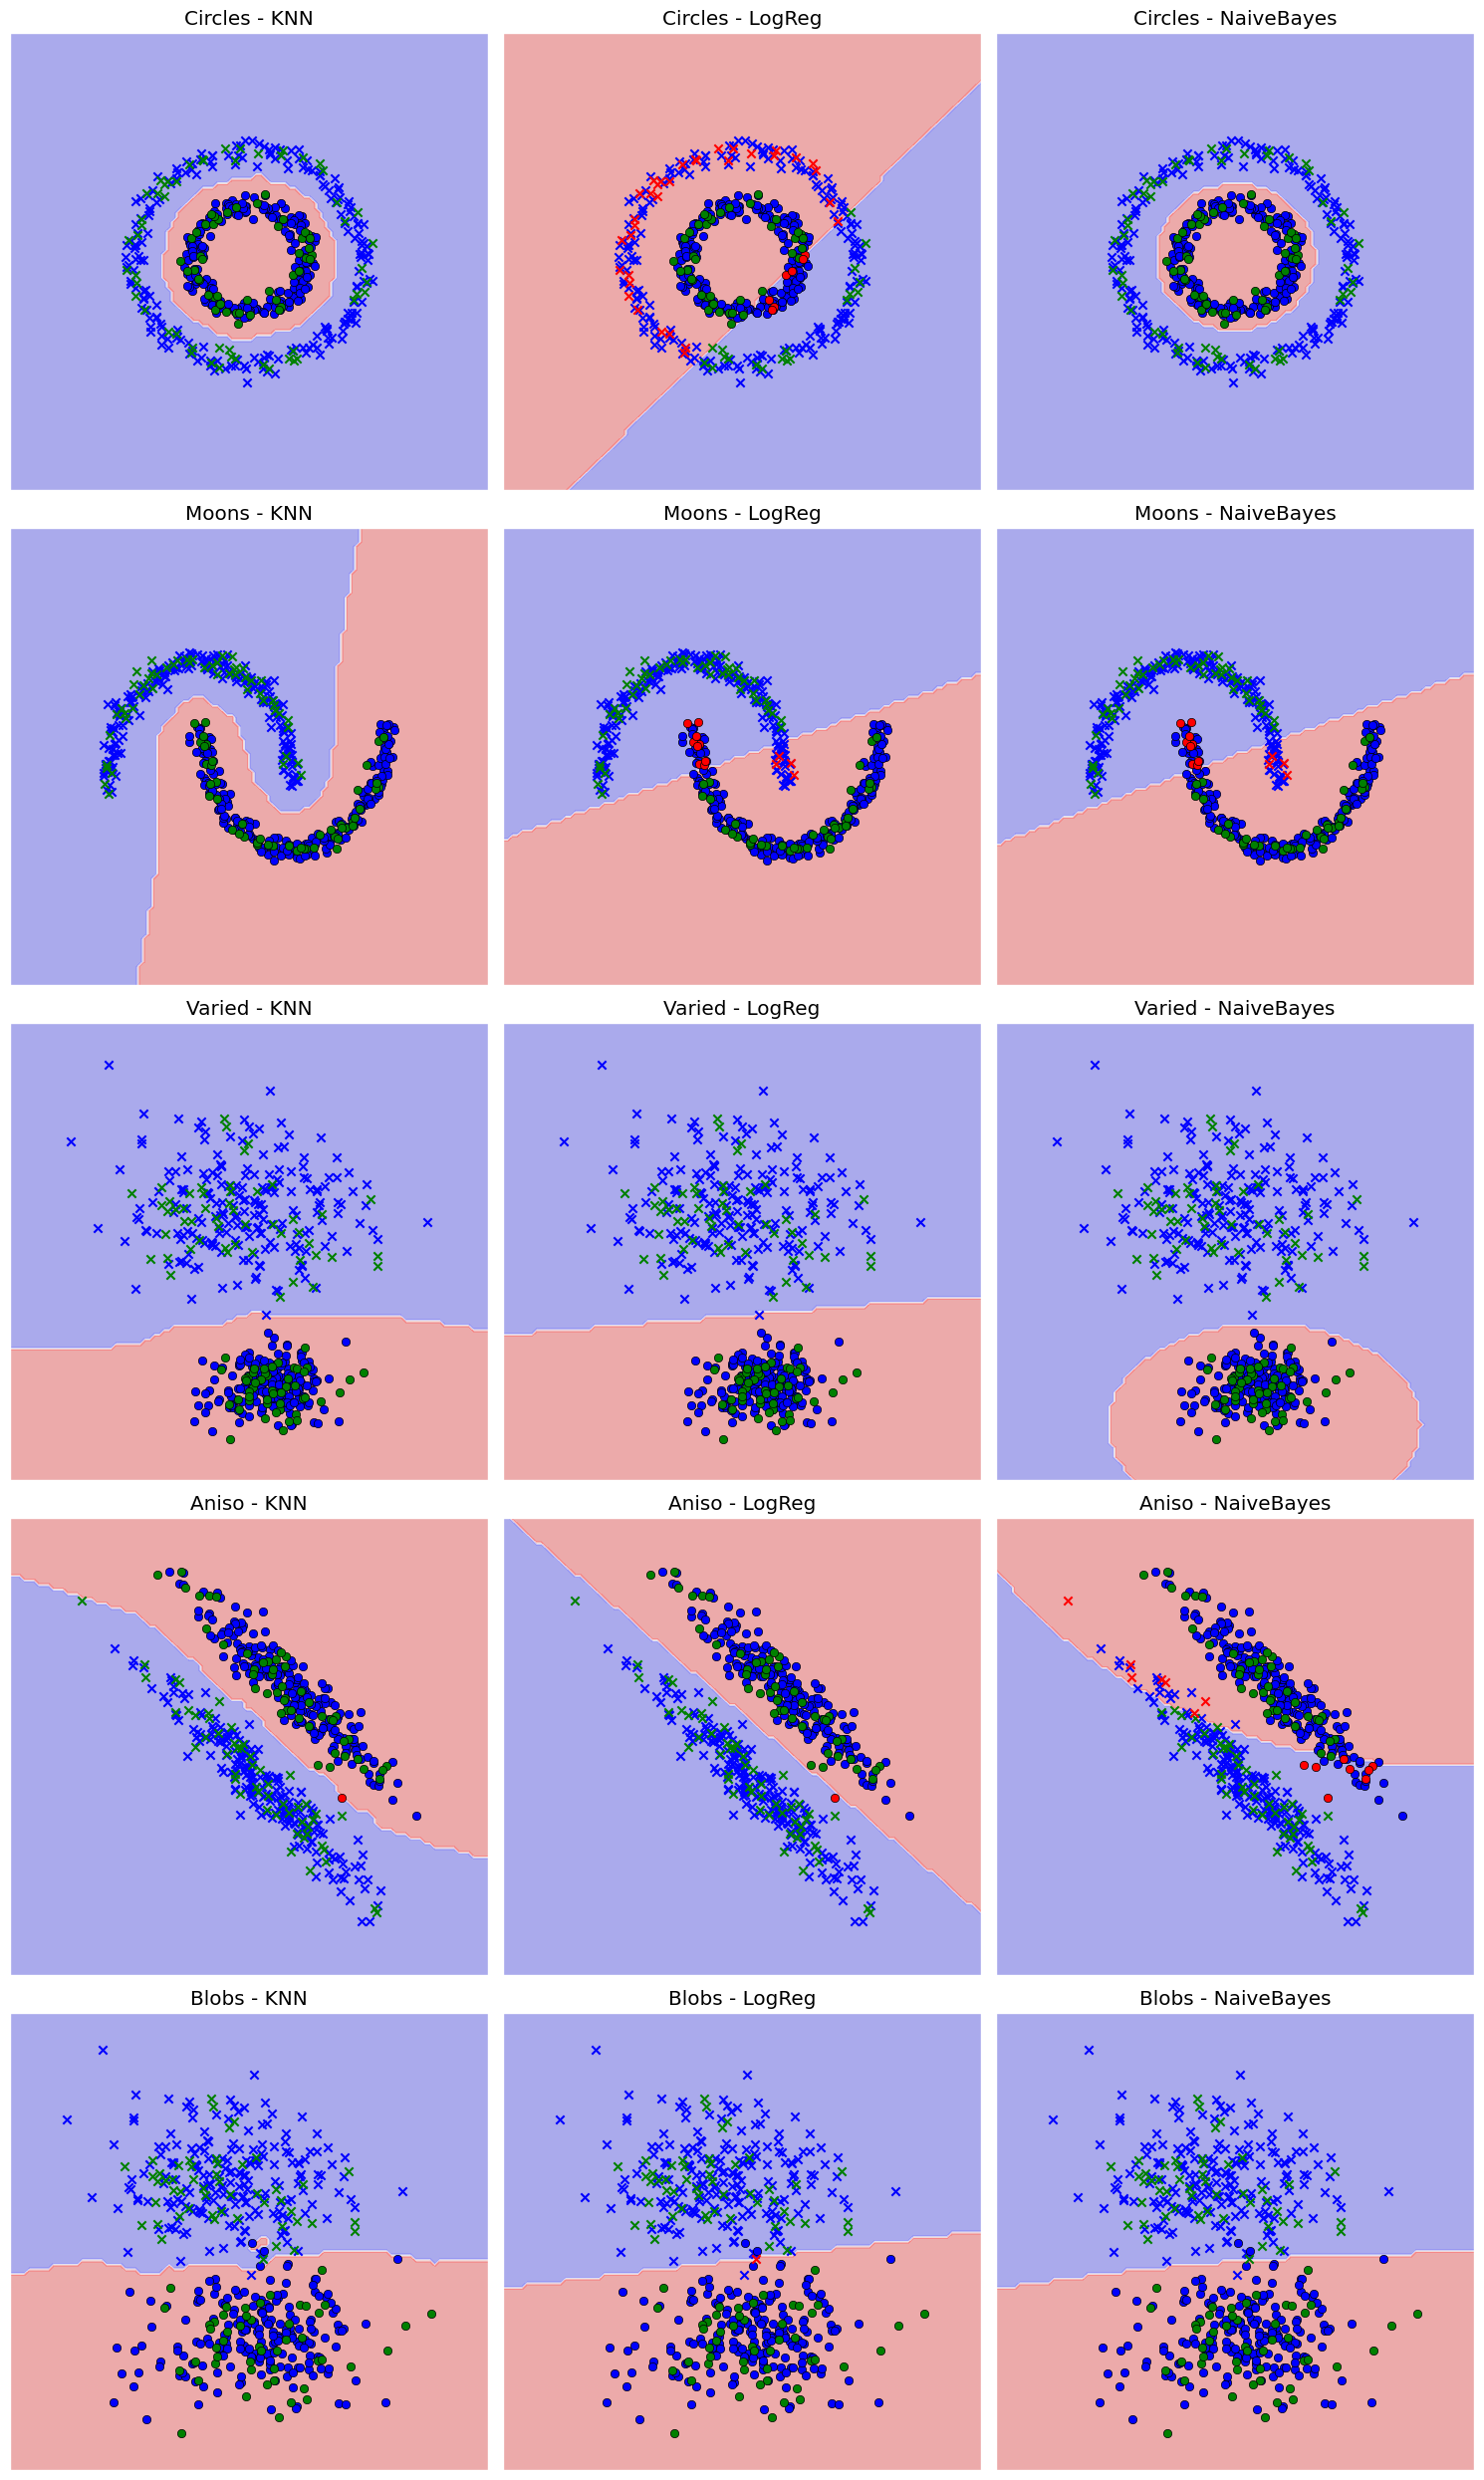

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

n_samples = 500
seed = 30
random_state_aniso = 170

noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 0.5], random_state=seed, centers=2)
x_aniso, y_aniso = datasets.make_blobs(n_samples=n_samples, random_state=random_state_aniso, centers=2)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
x_aniso = np.dot(x_aniso, transformation)
aniso = (x_aniso, y_aniso)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed, centers=2)

datasets_list = [
    ('Circles', noisy_circles),
    ('Moons', noisy_moons),
    ('Varied', varied),
    ('Aniso', aniso),
    ('Blobs', blobs)]

models = [
    ('KNN', KNeighborsClassifier(n_neighbors=3)),
    ('LogReg', LogisticRegression(max_iter=200)),
    ('NaiveBayes', GaussianNB())]

fig, axes = plt.subplots(5, 3, figsize=(15, 25))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

markers = ['x', 'o']

for i, (dataset_name, (X, y)) in enumerate(datasets_list):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    for j, (model_name, model) in enumerate(models):
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        temp_x = np.linspace(x_min, x_max, 100)
        temp_y = np.linspace(y_min, y_max, 100)
        xx, yy = np.meshgrid(temp_x, temp_y)
        grid = np.c_[xx.ravel(), yy.ravel()]
        Z = model.predict(grid)
        Z = Z.reshape(xx.shape)
        ax = axes[i, j]
        ax.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
        for k in range(len(x_train)):
            ax.scatter(x_train[k, 0], x_train[k, 1], 
                      marker=markers[y_train[k]], c='b', edgecolor='k')
        for k in range(len(x_test)):
            color = 'g' if y_test[k] == y_pred[k] else 'r'
            ax.scatter(x_test[k, 0], x_test[k, 1], 
                      marker=markers[y_test[k]], c=color, edgecolor='k')
        ax.set_title(f"{dataset_name} - {model_name}")
        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout()
plt.show()